Required imports

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the datasets

In [95]:
customers = pd.read_csv("/content/drive/MyDrive/ecommerce_eda/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/ecommerce_eda/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/ecommerce_eda/Transactions.csv")

Overview of each dataset

In [96]:
print("Customers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   C

Check for missing values

In [97]:
print("\nMissing Values in Customers:")
print(customers.isnull().sum())
print("\nMissing Values in Products:")
print(products.isnull().sum())
print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Check for duplicates

In [98]:
print("\nDuplicates in Customers:", customers.duplicated().sum())
print("Duplicates in Products:", products.duplicated().sum())
print("Duplicates in Transactions:", transactions.duplicated().sum())


Duplicates in Customers: 0
Duplicates in Products: 0
Duplicates in Transactions: 0


Analyze Customers

In [99]:
print("\nCustomer Region Distribution:")
print(customers["Region"].value_counts())


Customer Region Distribution:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


Plot customer sign-up trends

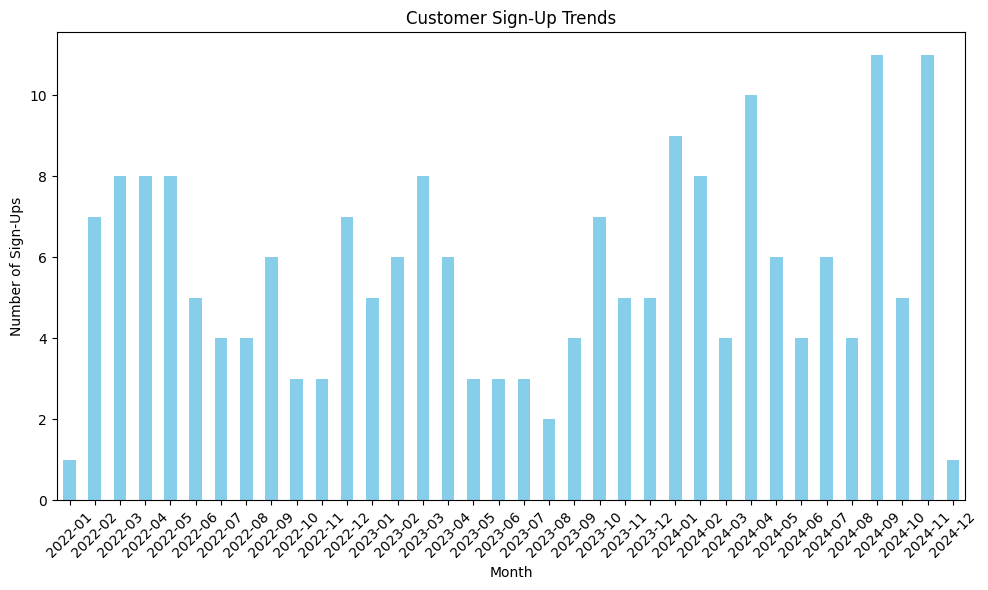

In [100]:
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
signup_trends = customers.groupby(customers["SignupDate"].dt.to_period("M")).size()

plt.figure(figsize=(10, 6))
signup_trends.plot(kind='bar', color='skyblue')
plt.title('Customer Sign-Up Trends')
plt.xlabel('Month')
plt.ylabel('Number of Sign-Ups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analyze Products

In [101]:
print("\nProduct Category Distribution:")
print(products["Category"].value_counts())


Product Category Distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


Analyze Transactions

In [102]:
print("\nTransaction Summary:")
print(transactions.describe())


Transaction Summary:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


Convert TransactionDate to datetime

In [103]:
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

Transaction trends over time

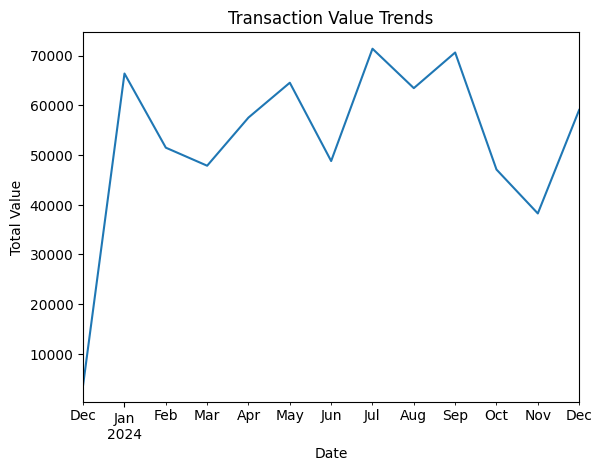

In [104]:
transaction_trends = (
    transactions.groupby(transactions["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()
)
transaction_trends.plot(kind="line", title="Transaction Value Trends", ylabel="Total Value", xlabel="Date")
plt.show()


Merged Data Analysis

In [105]:
merged_df = pd.merge(transactions, customers, on="CustomerID", how="left")
merged_df = pd.merge(merged_df, products, on="ProductID", how="left")

Top products by revenue

In [106]:
top_products = merged_df.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(20)
print("\nTop 20 Products by Revenue:")
print(top_products)


Top 20 Products by Revenue:
ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
SoundWave Desk Lamp        17920.10
TechPro Cookbook           17905.20
ActiveWear Textbook        17257.86
HomeSense Desk Lamp        15701.32
SoundWave Cookbook         15102.72
BookWorld Biography        15080.21
HomeSense Novel            14592.24
TechPro T-Shirt            14264.14
ActiveWear Headphones      13958.34
SoundWave Jeans            13947.20
Name: TotalValue, dtype: float64


Revenue by region


In [107]:
revenue_by_region = merged_df.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("\nRevenue by Region:")
print(revenue_by_region)


Revenue by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


Visualize revenue by region

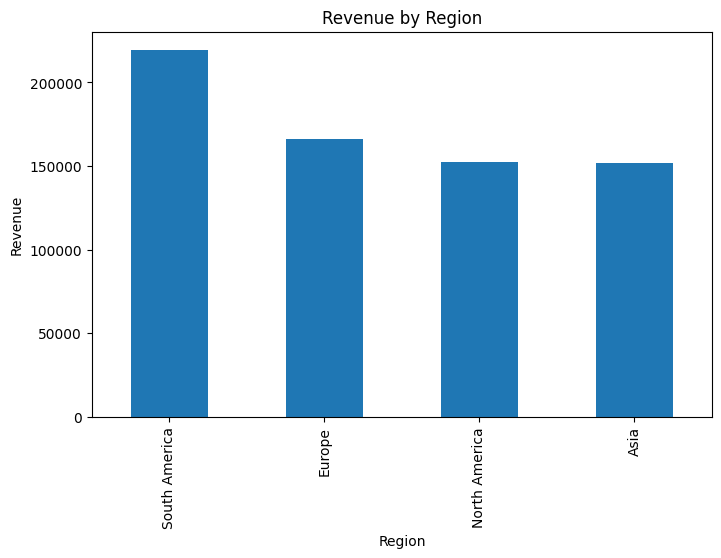

In [108]:
plt.figure(figsize=(8, 5))
revenue_by_region.plot(kind="bar", title="Revenue by Region", ylabel="Revenue", xlabel="Region")
plt.show()

Customer Lifetime Value


In [109]:
customer_lifetime_value = merged_df.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(20)
print("\nTop 20 Customers by Lifetime Value:")
print(customer_lifetime_value)


Top 20 Customers by Lifetime Value:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
C0087     6604.23
C0104     6579.10
C0175     6210.53
C0041     6149.78
C0102     6132.36
C0096     6072.92
C0143     6044.63
C0045     6021.80
C0013     6000.56
C0068     5950.42
Name: TotalValue, dtype: float64


Average Order Value (AOV)

In [110]:
average_order_value = merged_df["TotalValue"].mean()
print("\nAverage Order Value (AOV):", average_order_value)


Average Order Value (AOV): 689.9955600000001


Revenue contribution by product category


In [111]:
category_revenue = merged_df.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print("\nRevenue by Product Category:")
print(category_revenue)


Revenue by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


Identify underperforming products


In [112]:
underperforming_products = merged_df.groupby("ProductName")["TotalValue"].sum().sort_values().head(10)
print("\nUnderperforming Products:")
print(underperforming_products)


Underperforming Products:
ProductName
ComfortLiving Laptop            647.76
ActiveWear T-Shirt              795.34
ComfortLiving Rug              1063.81
SoundWave Bluetooth Speaker    1223.22
ComfortLiving Desk Lamp        1694.16
BookWorld Rug                  1722.42
ComfortLiving Headphones       2394.00
BookWorld Bluetooth Speaker    2790.15
HomeSense Headphones           2860.74
ActiveWear Biography           3047.40
Name: TotalValue, dtype: float64


Monthly sales trends

In [113]:
monthly_sales = merged_df.groupby(merged_df["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()
print("\nMonthly Sales Trends:")
print(monthly_sales)


Monthly Sales Trends:
TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


inactive customers by region

In [114]:
customers_with_transactions = merged_df["CustomerID"].unique()

inactive_customers = customers[~customers["CustomerID"].isin(customers_with_transactions)]

inactive_customers_by_region = inactive_customers["Region"].value_counts()

print("\nCount of Users Who Didn't Do At Least One Transaction by Region:")
print(inactive_customers_by_region)


Count of Users Who Didn't Do At Least One Transaction by Region:
Region
Asia    1
Name: count, dtype: int64
